<a href="https://colab.research.google.com/github/YuriQuisbert/Churn/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

#Dicionário das Variáveis


* `customerID`: ID do usuário
* `gender`: Genêro
* `SeniorCitizen`: Se é idoso
* `Partner`: Se possui parceiro(a)
* `Dependents`: Se possui dependentes
* `tenure`: Número de meses que o consumidor está com a empresa
* `PhoneService`: Se possui serviço telefonico
* `MultipleLines`: Se possui multiplas linhas telefonicas
* `InternetService`: Se possui serviço de internet
* `OnlineSecurity`: Se possui seguro online
* `OnlineBackup`: Se possui serviço de backup
* `DeviceProtection`: Se possui seguro no aparelho
* `TechSupport`: Se possui suporte técnico
* `StreamingTV`: Se possui serviço de TV
* `StreamingMovies`: Se possui serviço de Straming
* `Contract`: Tipo de contrato
* `PaperlessBilling`: Se faz pagamento com papel
* `PaymentMethod`: Método de pagamento
* `MonthlyCharges`: O valor cobrado do cliente mensalmente
* `TotalCharges`: O valor total cobrado do cliente
* `Churn`: Se cancelou o serviço

# Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Tratamentos iniciais - 1
###Removendo Linhas e Colunas indesejadas

Para começar o tratamento de dados, é desejável saber quais os tipos de variáveis que estamos trabalhando e se existem valores nulos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
for i in df:
  print(f'{i:15} \t{len(df[i].unique())}\t {df[i].dtypes}')

customerID      	7043	 object
gender          	2	 object
SeniorCitizen   	2	 int64
Partner         	2	 object
Dependents      	2	 object
tenure          	73	 int64
PhoneService    	2	 object
MultipleLines   	3	 object
InternetService 	3	 object
OnlineSecurity  	3	 object
OnlineBackup    	3	 object
DeviceProtection 	3	 object
TechSupport     	3	 object
StreamingTV     	3	 object
StreamingMovies 	3	 object
Contract        	3	 object
PaperlessBilling 	2	 object
PaymentMethod   	4	 object
MonthlyCharges  	1585	 float64
TotalCharges    	6531	 object
Churn           	2	 object


Não foram encontrados valores nulos, entretanto uma coisa que me chamou a atenção: a coluna `MonthlyCharges` ser categorizada como `object`, sendo que nela são entradas numéricas

In [4]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [5]:
df.TotalCharges.sort_values().unique()

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

Ao vasculhar melhor essa coluna, foi identificada 11 entradas vazias nessa coluna, entretanto não foram encontradas antes, pois neste caso se trata de uma string com espaço em branco " ". Para este caso, escolhi remover essas linhas, pois não afetariam o modelo de maneira relevante.

In [6]:
cont = df['TotalCharges'] == ' '
lista = []
for j, i in enumerate(cont):
  if i == True:
    lista.append(j)
lista

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [7]:
df=df.drop(lista)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df = df.reset_index(drop=True)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Após esse tratamento inicial, vemos que a variável `MonthlyCharges` já esta categorizada da maneira correta

---

Com as variáveis categorizadas de maneira correta, vou remover aquelas que não agregam valor para nosso modelo, no caso `customerID`.


In [8]:
for i in df:
  print(f'{i:15} \t{len(df[i].unique())}\t {df[i].dtypes}')

customerID      	7032	 object
gender          	2	 object
SeniorCitizen   	2	 int64
Partner         	2	 object
Dependents      	2	 object
tenure          	72	 int64
PhoneService    	2	 object
MultipleLines   	3	 object
InternetService 	3	 object
OnlineSecurity  	3	 object
OnlineBackup    	3	 object
DeviceProtection 	3	 object
TechSupport     	3	 object
StreamingTV     	3	 object
StreamingMovies 	3	 object
Contract        	3	 object
PaperlessBilling 	2	 object
PaymentMethod   	4	 object
MonthlyCharges  	1584	 float64
TotalCharges    	6530	 float64
Churn           	2	 object


In [9]:
df = df.drop(columns = ['customerID'])

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#Análises Iniciais

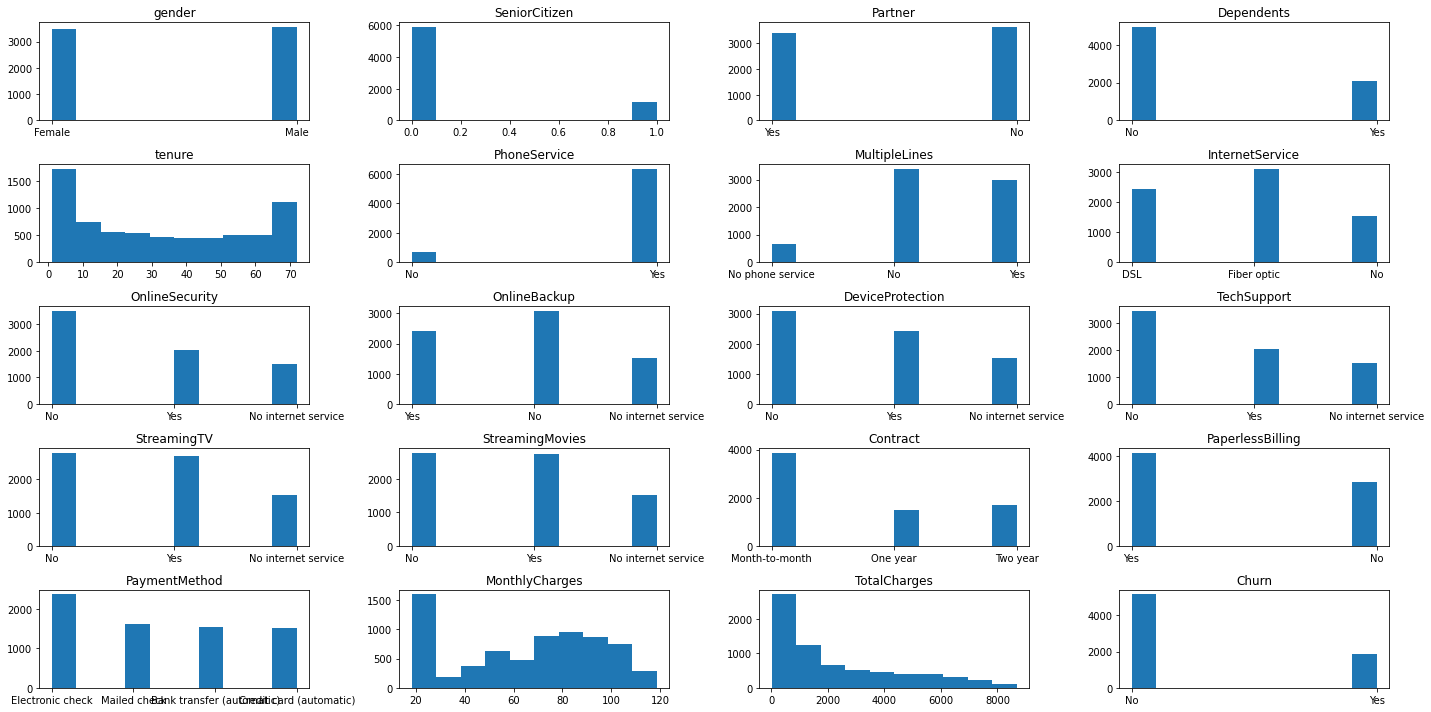

In [11]:
fig, ax = plt.subplots(nrows=5, ncols = 4, figsize=(20,10))

n=0
for i in range(0,5):
  for j in range(0,4):
    ax[i][j].hist(df.columns[n], data=df)
    ax[i][j].set_title(df.columns[n])
    n=n+1


plt.tight_layout()

Acima vemos como cada variável é distribuida no nosso dataset.

Atenção especial para a variável alvo `Churn`, onde existe um desbalanceamento muito grande das entradas.

---

Para continuar o trabalho de modelagem, é necessário transformar todas as categorias em categorias numéricas, uma vez que os modelos só conseguem trabalhar com números.

Para esse tipo de tratamento, utilizei a transformação em colunas Dummy, que cria uma nova coluna para cada categoria, validando em 0 ou 1 para False ou True, respectivamente.

Essa transformação traz um problema para nosso modelo, uma correlação de 100%, uma vez que é fácil prever o valor da última coluna Dummy, a partir do valor das outras!

Para isso não atrapalhar o modelo, utilizo o parâmetro `drop_first` que remove a primeira coluna Dummy, retirando essa correlação


In [12]:
dfdum = pd.get_dummies(df, drop_first=True)

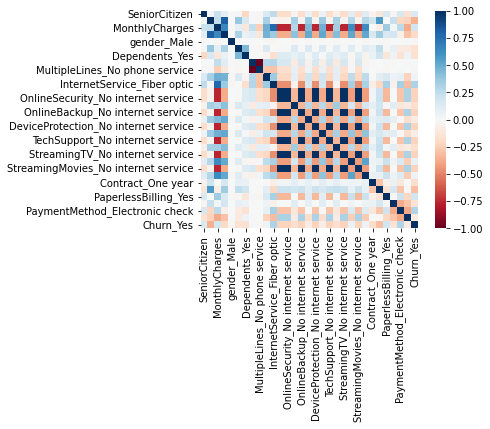

In [13]:
corr = dfdum.corr()
sns.heatmap(corr, cmap='RdBu', square=True, linecolor='white', annot=False)

Para minha surpresa, ainda existem colunas com relacionamento de 100%, isso ocorreu porque 3 situações são abordadas no nosso database.

* Pessoas que possuem Serviço de Telefone
* Pessoas que possuem Serviço de Internet
* Pessoas que possuem ambos serviços

Para tomar como exemplo, pessoas não possuem serviço de Internet por consequência não terão serviços relacionados a Internet, como Segurança Online ou Backup

#Tratamentos iniciais - 2
###Dividindo em 3 datasets

Para resolver o problema citado, resolvi tratar cada situação de maneira isolada, dividindo o dataset em 3

* `dfphone`: Pessoas que possuem Serviço de Telefone
* `dfinternet`: Pessoas que possuem Serviço de Internet
* `dftwice`: Pessoas que possuem ambos serviços

In [14]:
dfphone = df.loc[df['InternetService'] == 'No']
phonelist = dfphone.index.tolist()

In [15]:
dfinternet = df.loc[df['PhoneService'] == 'No']
internetlist = dfinternet.index.tolist()

In [16]:
dftwice = df.drop(phonelist)
dftwice = df.drop(internetlist)

In [17]:
droplist = []
for i in dfphone:
  if len(dfphone[i].unique()) == 1:
    droplist.append(i)
dfphone = dfphone.drop(columns = droplist)

In [18]:
droplist = []
for i in dfinternet:
  if len(dfinternet[i].unique()) == 1:
    droplist.append(i)
dfinternet = dfinternet.drop(columns = droplist)

In [19]:
droplist = []
for i in dftwice:
  if len(dftwice[i].unique()) == 1:
    droplist.append(i)
dftwice = dftwice.drop(columns = droplist)

#Análises - Dataframe Telefone

Coemçando pelas pessoas que possuem apenas o Serviço de Telefone

In [40]:
dfphone.shape[0]

1520

Vemos que é um dataset de 1520 entradas, um espaço de amostras bom para fazermos nossa análise.

In [20]:
for i in dfphone:
  print(f'{i:15} \t{len(dfphone[i].unique())}\t {dfphone[i].dtypes}')

gender          	2	 object
SeniorCitizen   	2	 int64
Partner         	2	 object
Dependents      	2	 object
tenure          	72	 int64
MultipleLines   	2	 object
Contract        	3	 object
PaperlessBilling 	2	 object
PaymentMethod   	4	 object
MonthlyCharges  	123	 float64
TotalCharges    	1381	 float64
Churn           	2	 object


Todas as variáveis estão categorizadas da maneira correta, a seguir, vou transformar o dataset em colunas Dummy, assim como foi feito na etapa anterior.

In [21]:
dfphonedum = pd.get_dummies(dfphone, drop_first=True)

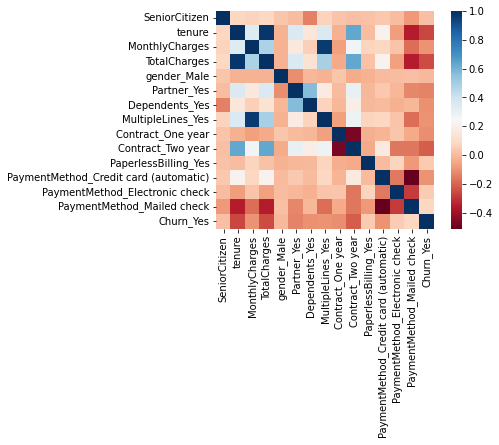

In [24]:
corr = dfphonedum.corr()
sns.heatmap(corr, cmap='RdBu', square=True, linecolor='white', annot=False)

É possível perceber, pelo mapa de correlação, quanto que diminuiu o nível de correlação entre as entradas, permitindo a criação de modelos mais acertivos.

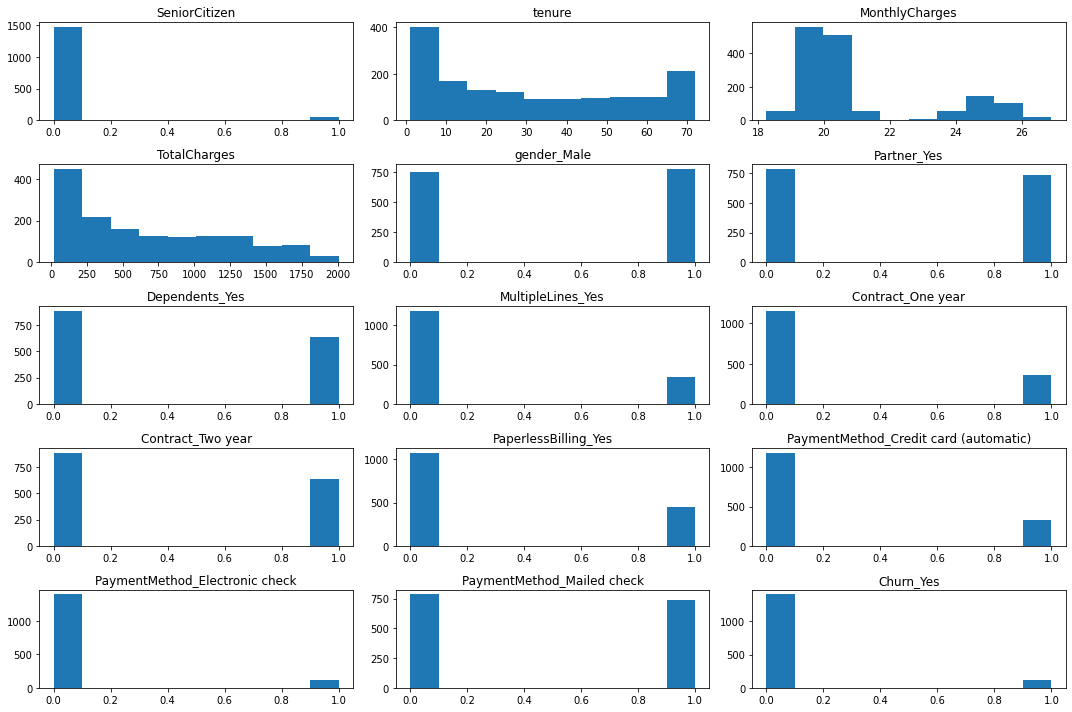

In [23]:
fig, ax = plt.subplots(nrows=5, ncols = 3, figsize=(15,10))

n=0
for i in range(0,5):
  for j in range(0,3):
    ax[i][j].hist(dfphonedum.columns[n], data=dfphonedum)
    ax[i][j].set_title(dfphonedum.columns[n])
    n=n+1


plt.tight_layout()

Acima vemos como cada variável é distribuida no nosso dataset.

Atenção especial para a variável alvo `Churn`, onde existe um desbalanceamento muito grande das entradas.

#Modelo - Dataframe Telefone

O Grid Search é um método de avaliar vários parâmetros de um modelo de Machine Learning e identificar aquele que melhor se encaixa no modelo que está sendo desenvolvido, fazer isso de maneira manual muitas vezes é trabalhoso e até mesmo inviável.

Vou trazer a seguir a referência utilizando o modelo padrão, com parâmetros *default* e a seguir, com um dos seus parâmetros elegido pelo Grid Search.

Farei isso para todos os 3 datasets que temos.

Modelo sem Grid Search

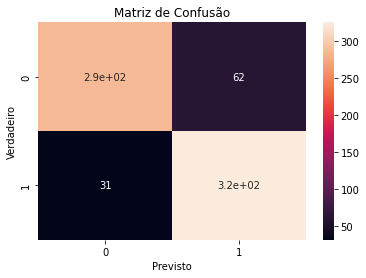

In [25]:
#Bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

#Escolha do modelo
model00 = LogisticRegression()

#Dividindo o Taget
Xphone = dfphonedum.drop('Churn_Yes', axis=1)
yphone = dfphonedum['Churn_Yes']

#Balanceando os dados
smote = SMOTE(random_state = 32)
Xphone, yphone = smote.fit_resample(Xphone, yphone)

#Dividindo treino e teste
X_train00, X_test00, y_train00, y_test00 = train_test_split(Xphone, yphone)

#Normalizando os dados - treino
scaler = StandardScaler().fit(X_train00)
X_train00 = scaler.transform(X_train00)

#Machine Learning
model00.fit(X_train00, y_train00)

#Normalizando os dados - teste
X_test00 = scaler.transform(X_test00)

#Realizando a precição
y_pred = model00.predict(X_test00)

#Plotar a Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test00, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Utilizando Grid Search

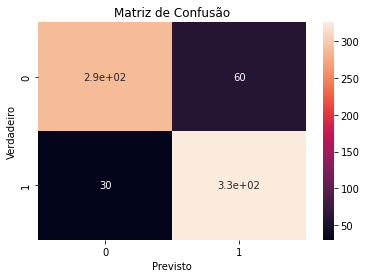

In [26]:
from sklearn.model_selection import GridSearchCV

X_train01 = X_train00.copy()
X_test01 = X_test00.copy()
y_train01 = y_train00.copy()
y_test01 = y_test00.copy()

parameters = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    }

clf = GridSearchCV(model00, parameters)
clf.fit(X_train01, y_train01)

model01 = LogisticRegression(C = clf.best_params_['C'])

model01.fit(X_train01, y_train01)

y_pred = model01.predict(X_test01)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test00, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Por se tratar de um único parâmetro a ser elegido e dentro de um espaço pequeno de possibilidades, pode não ter uma melhora significativa no modelo, entretanto qualquer melhora, mínima que seja, é bem vista para o desenvolvimento de um modelo de machine learning.

#Análises - Dataframe Internet



agora farei para pessoas que possuem apenas o Serviço de Internet

In [41]:
dfinternet.shape[0]

680

Vemos que é um dataset de 680 entradas, um espaço de amostras médio para fazermos nossa análise.

In [28]:
for i in dfinternet:
  print(f'{i:15} \t{len(dfinternet[i].unique())}\t {dfinternet[i].dtypes}')

gender          	2	 object
SeniorCitizen   	2	 int64
Partner         	2	 object
Dependents      	2	 object
tenure          	72	 int64
OnlineSecurity  	2	 object
OnlineBackup    	2	 object
DeviceProtection 	2	 object
TechSupport     	2	 object
StreamingTV     	2	 object
StreamingMovies 	2	 object
Contract        	3	 object
PaperlessBilling 	2	 object
PaymentMethod   	4	 object
MonthlyCharges  	390	 float64
TotalCharges    	666	 float64
Churn           	2	 object


Todas as variáveis estão categorizadas da maneira correta, a seguir, vou transformar o dataset em colunas Dummy, assim como foi feito na etapa anterior.

In [29]:
dfinternetdum = pd.get_dummies(dfinternet, drop_first=True)

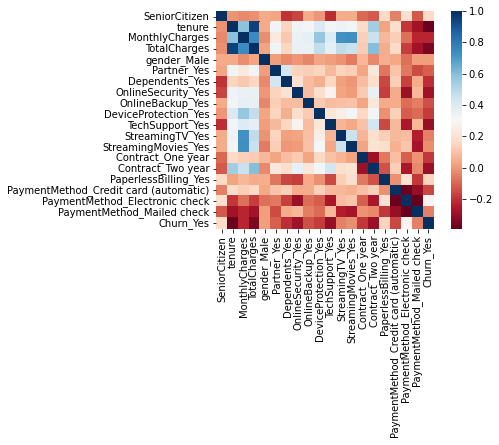

In [30]:
corr = dfinternetdum.corr()
sns.heatmap(corr, cmap='RdBu', square=True, linecolor='white', annot=False)

É possível perceber, pelo mapa de correlação, quanto que diminuiu o nível de correlação entre as entradas, permitindo a criação de modelos mais acertivos.

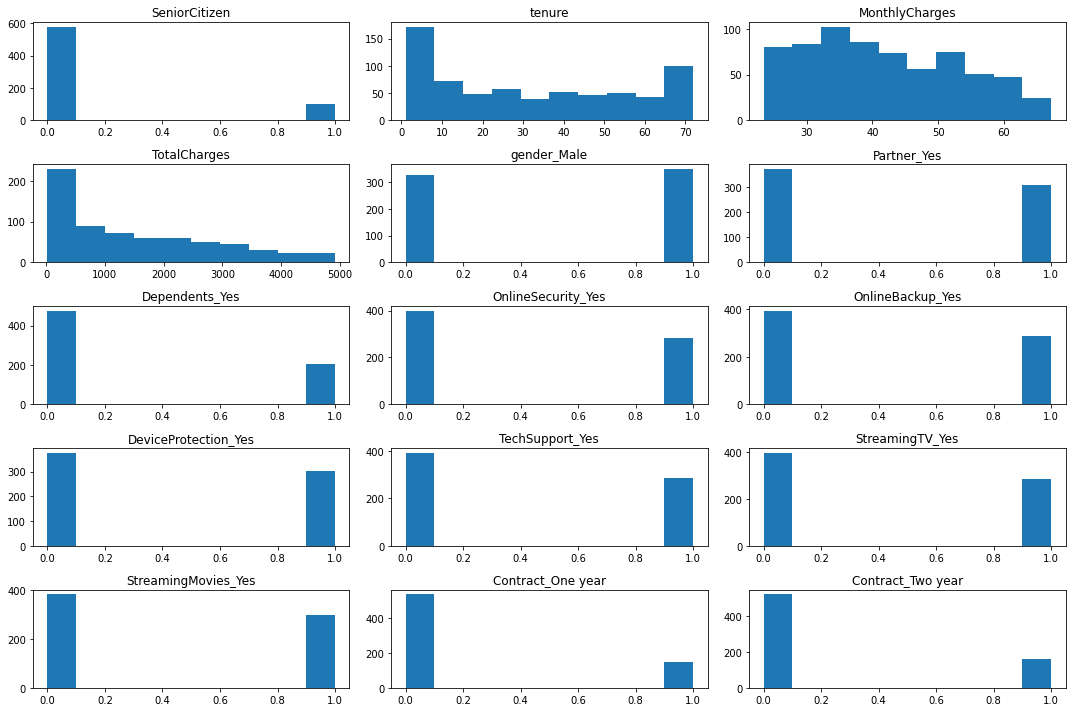

In [31]:
fig, ax = plt.subplots(nrows=5, ncols = 3, figsize=(15,10))

n=0
for i in range(0,5):
  for j in range(0,3):
    ax[i][j].hist(dfinternetdum.columns[n], data=dfinternetdum)
    ax[i][j].set_title(dfinternetdum.columns[n])
    n=n+1


plt.tight_layout()

Acima vemos como cada variável é distribuida no nosso dataset.

Atenção especial para a variável alvo `Churn`, onde existe um desbalanceamento muito grande das entradas.

#Modelo - Dataframe Internet

Modelo sem Grid Search

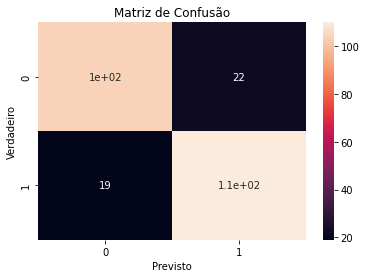

In [43]:
#Bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

#Escolha do modelo
model10 = LogisticRegression()

#Dividindo o Taget
Xinternet = dfinternetdum.drop('Churn_Yes', axis=1)
yinternet = dfinternetdum['Churn_Yes']

#Balanceando os dados
smote = SMOTE(random_state = 32)
Xinternet, yinternet = smote.fit_resample(Xinternet, yinternet)

#Dividindo treino e teste
X_train10, X_test10, y_train10, y_test10 = train_test_split(Xinternet, yinternet)

#Normalizando os dados - treino
scaler = StandardScaler().fit(X_train10)
X_train10 = scaler.transform(X_train10)

#Machine Learning
model10.fit(X_train10, y_train10)

#Normalizando os dados - teste
X_test10 = scaler.transform(X_test10)

#Realizando a precição
y_pred = model10.predict(X_test10)

#Plotar a Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test10, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Utilizando Grid Search

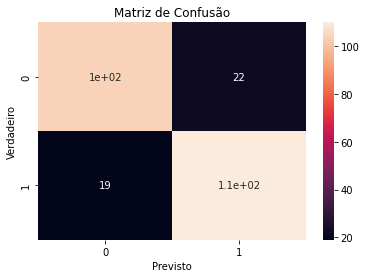

In [47]:
from sklearn.model_selection import GridSearchCV

X_train11 = X_train10.copy()
X_test11 = X_test10.copy()
y_train11 = y_train10.copy()
y_test11 = y_test10.copy()

parameters = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    }

clf = GridSearchCV(model10, parameters)
clf.fit(X_train11, y_train11)

model11 = LogisticRegression(C = clf.best_params_['C'])

model11.fit(X_train11, y_train11)

y_pred = model11.predict(X_test11)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test11, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Por se tratar de um único parâmetro a ser elegido e dentro de um espaço pequeno de possibilidades, pode não ter uma melhora significativa no modelo, entretanto qualquer melhora, mínima que seja, é bem vista para o desenvolvimento de um modelo de machine learning.

#Análises - Dataframe Ambos



Agora vou fazer para pessoas que possuem ambos serviços.

In [42]:
dftwice.shape[0]

6352

Vemos que é um dataset de 6352 entradas, um espaço de amostras ótimo para fazermos nossa análise.



In [34]:
for i in dftwice:
  print(f'{i:15} \t{len(dftwice[i].unique())}\t {dftwice[i].dtypes}')

gender          	2	 object
SeniorCitizen   	2	 int64
Partner         	2	 object
Dependents      	2	 object
tenure          	72	 int64
MultipleLines   	2	 object
InternetService 	3	 object
OnlineSecurity  	3	 object
OnlineBackup    	3	 object
DeviceProtection 	3	 object
TechSupport     	3	 object
StreamingTV     	3	 object
StreamingMovies 	3	 object
Contract        	3	 object
PaperlessBilling 	2	 object
PaymentMethod   	4	 object
MonthlyCharges  	1401	 float64
TotalCharges    	5922	 float64
Churn           	2	 object


Todas as variáveis estão categorizadas da maneira correta, a seguir, vou transformar o dataset em colunas Dummy, assim como foi feito na etapa anterior.

In [35]:
dftwicedum = pd.get_dummies(dftwice, drop_first=True)

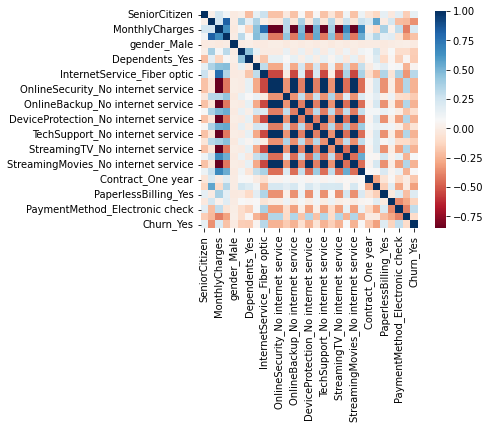

In [36]:
corr = dftwicedum.corr()
sns.heatmap(corr, cmap='RdBu', square=True, linecolor='white', annot=False)

É possível perceber, pelo mapa de correlação, que mesmo com o tratamento anterior, ainda existem entradas com alta correlação.

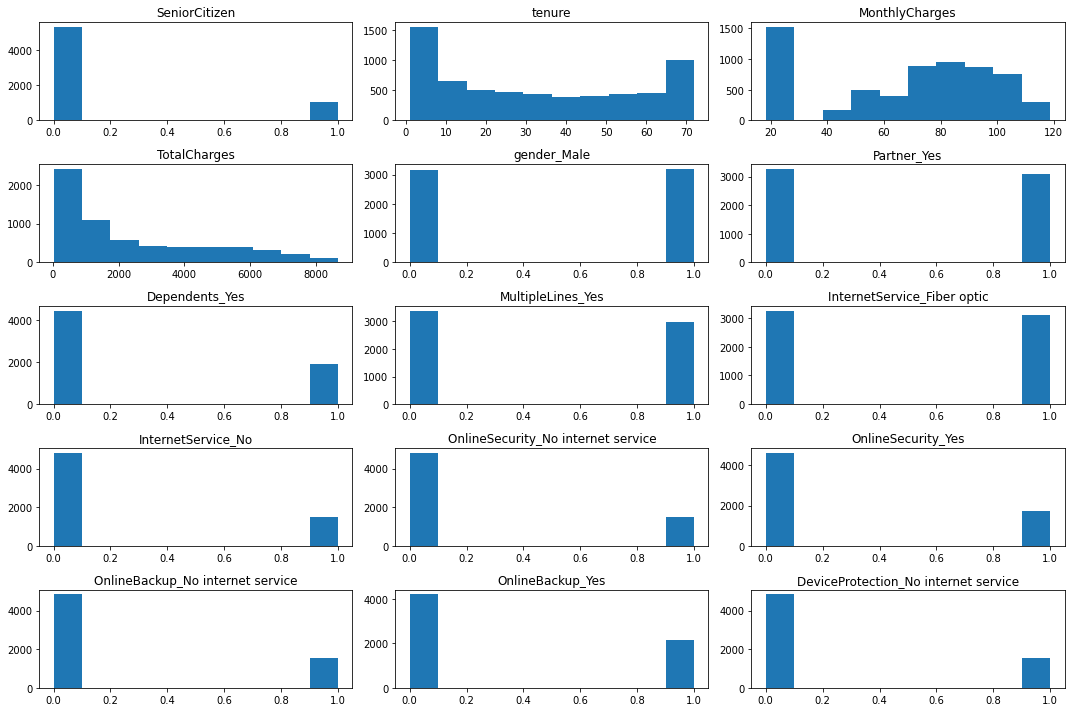

In [37]:
fig, ax = plt.subplots(nrows=5, ncols = 3, figsize=(15,10))

n=0
for i in range(0,5):
  for j in range(0,3):
    ax[i][j].hist(dftwicedum.columns[n], data=dftwicedum)
    ax[i][j].set_title(dftwicedum.columns[n])
    n=n+1


plt.tight_layout()

Acima vemos como cada variável é distribuida no nosso dataset.

Atenção especial para a variável alvo `Churn`, onde existe um desbalanceamento muito grande das entradas.

#Modelo - Dataframe Ambos

Modelo sem Grid Search

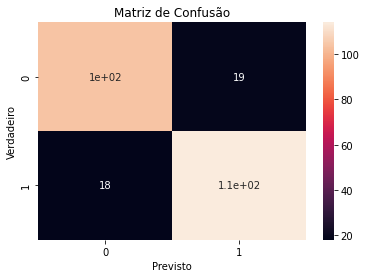

In [38]:
#Bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

#Escolha do modelo
model20 = LogisticRegression()

#Dividindo o Taget
Xinternet = dfinternetdum.drop('Churn_Yes', axis=1)
yinternet = dfinternetdum['Churn_Yes']

#Balanceando os dados
smote = SMOTE(random_state = 32)
Xinternet, yinternet = smote.fit_resample(Xinternet, yinternet)

#Dividindo treino e teste
X_train20, X_test20, y_train20, y_test20 = train_test_split(Xinternet, yinternet)

#Normalizando os dados - treino
scaler = StandardScaler().fit(X_train20)
X_train20 = scaler.transform(X_train20)

#Machine Learning
model20.fit(X_train20, y_train20)

#Normalizando os dados - teste
X_test20 = scaler.transform(X_test20)

#Realizando a precição
y_pred = model20.predict(X_test20)

#Plotar a Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test20, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Utilizando Grid Search

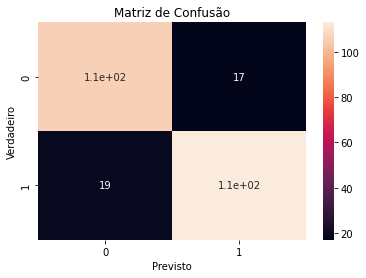

In [39]:
from sklearn.model_selection import GridSearchCV

X_train21 = X_train20.copy()
X_test21 = X_test20.copy()
y_train21 = y_train20.copy()
y_test21 = y_test20.copy()

parameters = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    }

clf = GridSearchCV(model20, parameters)
clf.fit(X_train21, y_train21)

model21 = LogisticRegression(C = clf.best_params_['C'])

model21.fit(X_train21, y_train21)

y_pred = model21.predict(X_test21)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test21, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Por se tratar de um único parâmetro a ser elegido e dentro de um espaço pequeno de possibilidades, pode não ter uma melhora significativa no modelo, entretanto qualquer melhora, mínima que seja, é bem vista para o desenvolvimento de um modelo de machine learning.